Link to goggle slide show, minimal

https://docs.google.com/presentation/d/16kIT1zNulrBfI7DeoQk96vY_r4VAVQYj-J5SeDjy4OY/edit?usp=sharing

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")



df = pd.read_csv('Video_Games_Sales_With_Scores.csv') #https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings/data


# Data cleaning + other

In [3]:
df.head()
df=df.loc[df['Year_of_Release']<2017.0] #Does not include games after 2016


In [4]:
no_tbd_df = df.copy()
no_tbd_df = no_tbd_df[((no_tbd_df.User_Score != "tbd"))]
no_tbd_df["User_Score"]= no_tbd_df['User_Score'].astype(float)
no_tbd_df["User_Score"]=no_tbd_df["User_Score"]*10 #User score was out of 10 and Critic core out of 100. This equalises them
no_tbd_df["Average_Score"]= (no_tbd_df["User_Score"]+no_tbd_df["Critic_Score"])/2
#no_tbd_df.head()

In [5]:
def find_outliers(df,number_column,index=False): #Gives list of outliers based on given dateset and column. If index is true, gives the index of outliers
    q1 = df[number_column].quantile(0.25)
    q3 = df[number_column].quantile(0.75)
    upper = q3 + 1.5*(q3-q1) #upper bond for outlier
    lower = q1 - 1.5*(q3-q1) #lowe bond for outliers
    
    column_index =df.columns.get_loc(number_column)#Gets index of column given
    outlier_list=[]
    outlier_index_list =[]
    
    i=0
    while i < len(df):
        if df.iloc[i,column_index] < lower:
            outlier_list.append(df.iloc[i,column_index])
            outlier_index_list.append(i)
        if df.iloc[i,6] > upper:
            outlier_list.append(df.iloc[i,column_index])
            outlier_index_list.append(i)
        i=i+1
    if index == False:
        return outlier_list
    if index ==True:
        return outlier_index_list
        
#find_outliers(df,"Global_Sales", True)

In [6]:
def drop_outliers(df,number_column):
    outlier_list=find_outliers(df,number_column,True)
    df.reset_index(drop=True, inplace=True)
    df= df.drop(outlier_list,axis=0)
    return df
    
no_tbd_df= drop_outliers(no_tbd_df,"Critic_Score")
no_tbd_df= drop_outliers(no_tbd_df,"Global_Sales")
no_tbd_df= drop_outliers(no_tbd_df,"Average_Score")
no_tbd_df= drop_outliers(no_tbd_df,"Year_of_Release")
# no_tbd_df.head()

#no_tbd_df=no_tbd_df.loc[no_tbd_df['Global_Sales']<50] #Wii Sports as it appeared as an outlier in terms of Sales
# no_tbd_df.loc[no_tbd_df['Global_Sales']>50] 

In [37]:
df.iloc[1,1]
print(df['Rating'].unique())#This does the same, was not aware of this at the time of creation

def list_unique(dataframe,column): #Creates a list of unique variables
    i=0
    platform_list=[]
    column_index =dataframe.columns.get_loc(column)#Gets index of column given
    while i < len(dataframe):
        if dataframe.iloc[i,column_index] not in platform_list: #if not currently in list, add to the list
            platform_list.append(dataframe.iloc[i,column_index])
        i=i+1
    return(platform_list)
list=list_unique(df,"Rating")


['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [ ]:
#Converting ratings to adult, teen and child


In [33]:
def highest_x(dataframe,column,column2): #Given 3 varibales, retuns dataframe of highest column2 of each unique variable of column
    test_list= list_unique(dataframe,column) #performs previous function on given variables

    new_df= dataframe.iloc[:0].copy()#empty version of fiven dataframe (columns stil presant)
    i=0
    while i < len(test_list):
        given_list=dataframe.loc[dataframe[column]==test_list[i]]
        new_value=given_list[given_list[column2]==given_list[column2].max()]
        new_df = pd.concat([new_df, new_value], ignore_index = True) 
        i=i+1
    return new_df

#highest_x(no_tbd_df,"Platform","Global_Sales").head()

In [9]:
correlation_na = df['Critic_Score'].corr(df['NA_Sales'])
correlation_eu = df['Critic_Score'].corr(df['EU_Sales'])
correlation_jp = df['Critic_Score'].corr(df['JP_Sales'])
correlation_global = df['Critic_Score'].corr(df['Global_Sales'])

correlation_global 
correlation_jp
correlation_eu 
correlation_na
print(correlation_global,correlation_jp,correlation_eu,correlation_na)

0.24531816355271435 0.15347389041536139 0.22127568477452478 0.24008320620582413


In [10]:


sorted_corr=no_tbd_df.select_dtypes(include="number").corr().unstack().sort_values(ascending=False)
sorted_corr[sorted_corr!=1].head(20)

Global_Sales   NA_Sales         0.897234
NA_Sales       Global_Sales     0.897234
Average_Score  User_Score       0.861440
User_Score     Average_Score    0.861440
Average_Score  Critic_Score     0.855920
Critic_Score   Average_Score    0.855920
EU_Sales       Global_Sales     0.761260
Global_Sales   EU_Sales         0.761260
EU_Sales       NA_Sales         0.634704
NA_Sales       EU_Sales         0.634704
Other_Sales    Global_Sales     0.613955
Global_Sales   Other_Sales      0.613955
NA_Sales       Other_Sales      0.477023
Other_Sales    NA_Sales         0.477023
User_Score     Critic_Score     0.474705
Critic_Score   User_Score       0.474705
JP_Sales       Global_Sales     0.433681
Global_Sales   JP_Sales         0.433681
EU_Sales       Other_Sales      0.363031
Other_Sales    EU_Sales         0.363031
dtype: float64

# Visualisation 

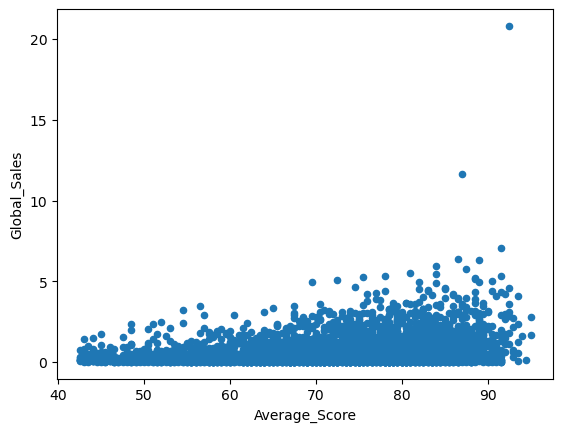

In [11]:
no_tbd_df.plot(x='Average_Score', 
        y='Global_Sales', 
        kind='scatter');

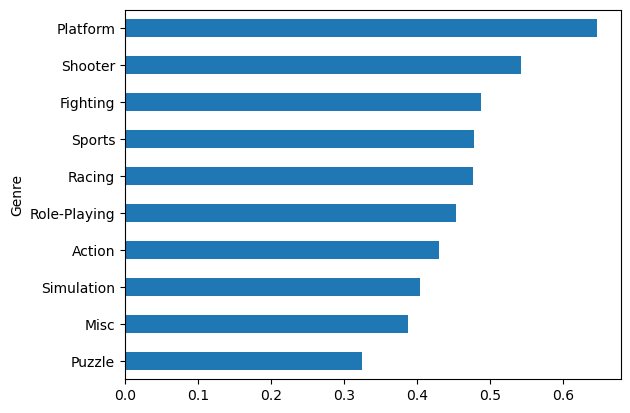

In [12]:
length = no_tbd_df.groupby("Genre")["Global_Sales"]\
              .agg(['count', 'mean'])\
              .sort_values(by='mean', ascending=False)\
              .head(10) #to keep only the 5 most popular Subjects

length['mean'].sort_values().plot.barh();

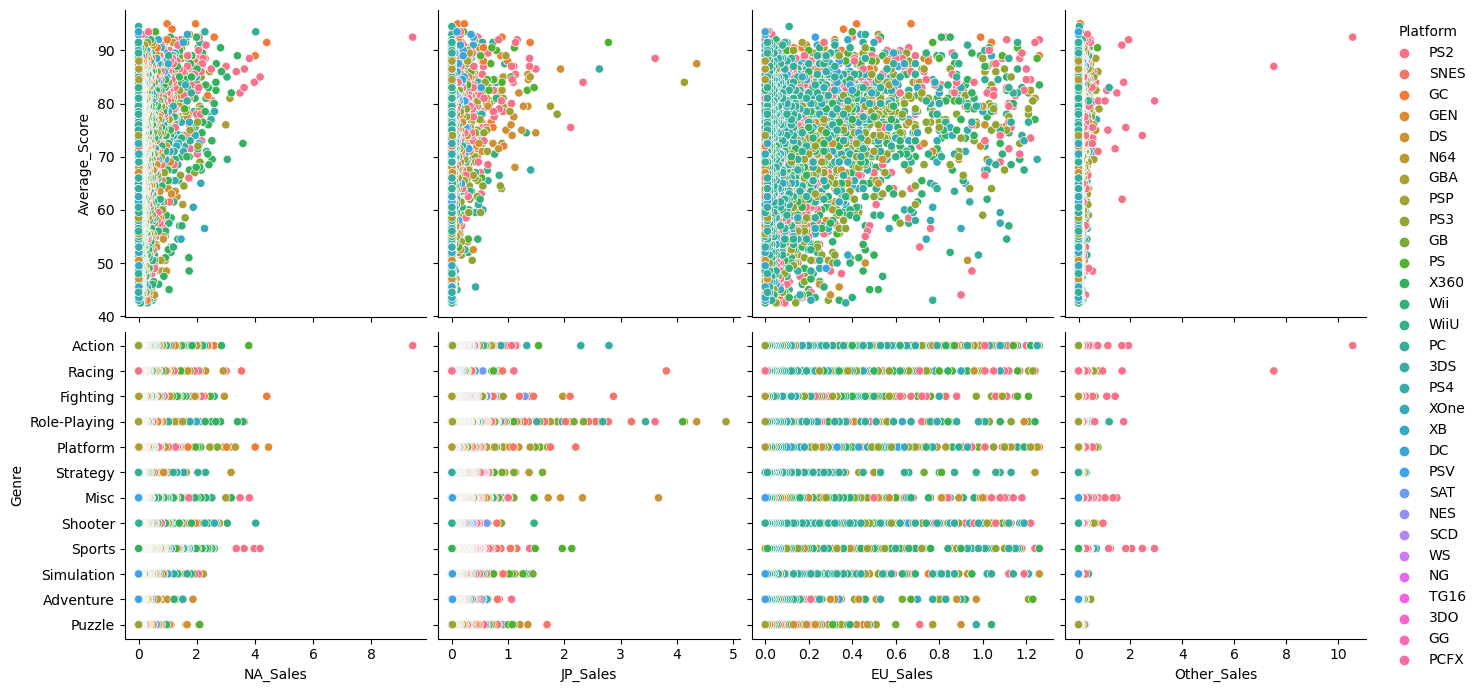

In [13]:
sns.pairplot(x_vars=['NA_Sales', 'JP_Sales', \
                     'EU_Sales', 'Other_Sales'], \
             y_vars=['Average_Score', 'Genre'], \
             hue='Platform', 
             height=3.5,
             data=no_tbd_df);

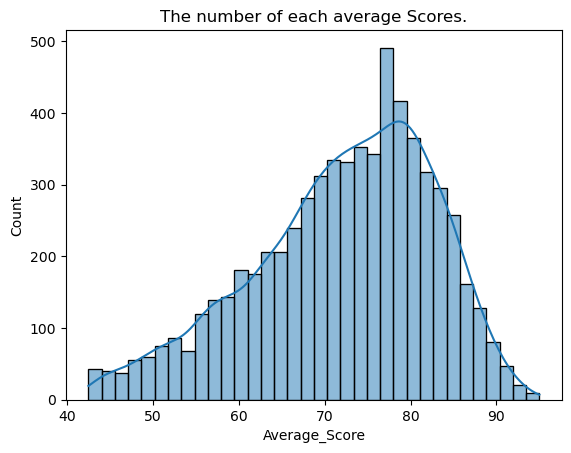

In [15]:
sns.histplot(no_tbd_df.Average_Score, kde=True)
plt.title("The number of each average Scores.");

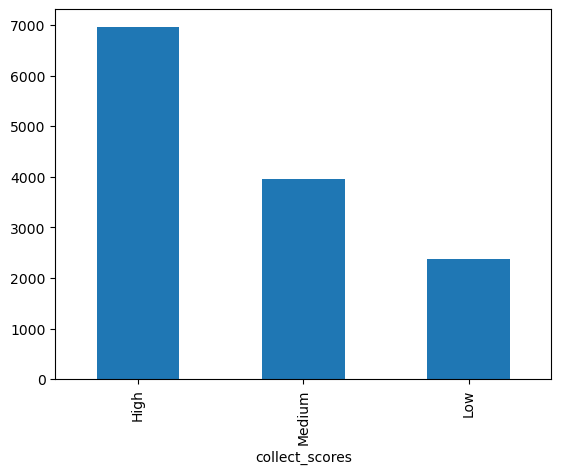

In [16]:
def collect_scores(scores):
    return 'Low' if scores < 70 else 'Medium' if scores < 90 else 'High'
score_df =no_tbd_df.copy()
score_df['collect_scores'] = score_df['Average_Score'].apply(collect_scores)
score_df['collect_scores'].value_counts().plot(kind='bar');

In [17]:

# graph_df= no_tbd_df.sample(100)
# no_tbd_df.plot(x="Average_Score", y=["Critic_Score","User_Score" ], kind="line", figsize=(10, 9))

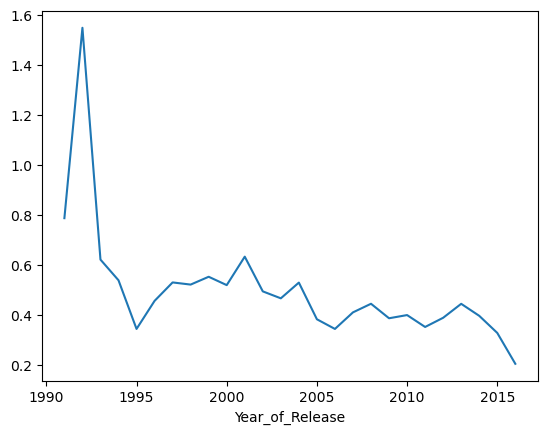

In [85]:
length = no_tbd_df.groupby("Year_of_Release")["Global_Sales"]\
            .agg(['count', 'mean'])\
            .sort_values(by='Year_of_Release')
#better graph later
length['mean'].dropna().plot();

plt.show()

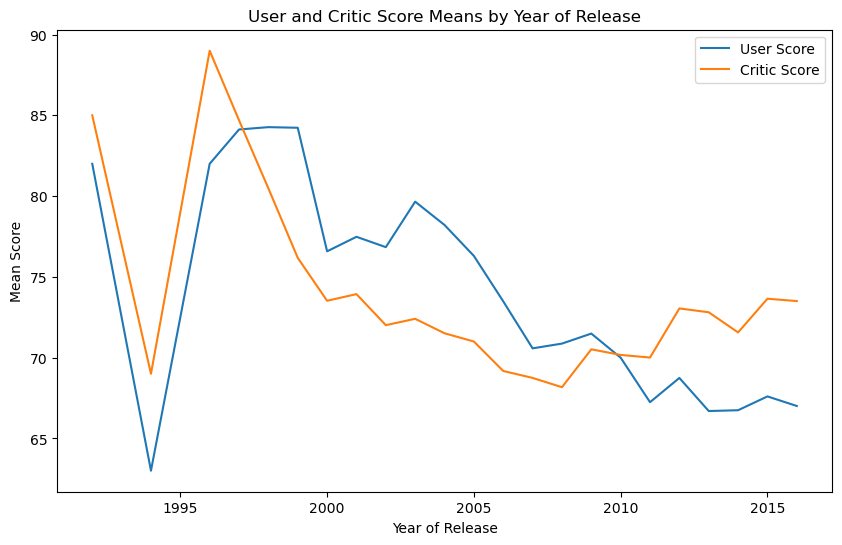

In [19]:
length = no_tbd_df.groupby("Year_of_Release")["User_Score"]\
            .agg(['count', 'mean'])\
            .sort_values(by='Year_of_Release')

length2 = no_tbd_df.groupby("Year_of_Release")["Critic_Score"]\
            .agg(['count', 'mean'])\
            .sort_values(by='Year_of_Release')


plt.figure(figsize=(10, 6))
plt.plot(length['mean'].dropna(), label='User Score')
plt.plot(length2['mean'].dropna(), label='Critic Score')


plt.xlabel('Year of Release')
plt.ylabel('Mean Score')
plt.title('User and Critic Score Means by Year of Release')
plt.legend()


plt.show()

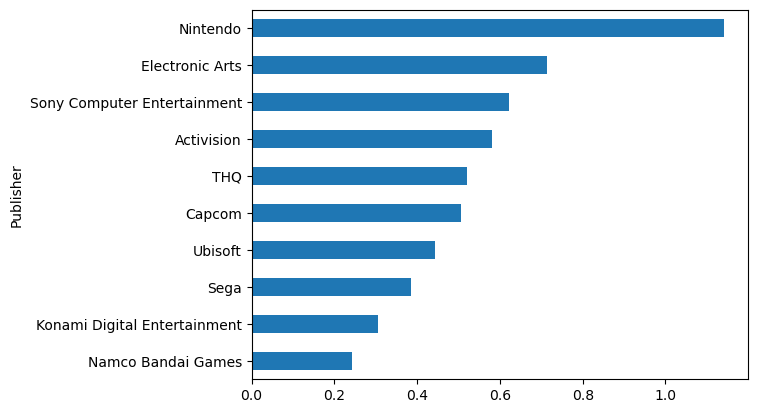

In [20]:
length = no_tbd_df.groupby("Publisher")["Global_Sales"]\
              .agg(['count', 'mean'])\
              .sort_values(by='count', ascending=False)\
              .head(10) #to keep only the 5 most popular Subjects

length['mean'].sort_values().plot.barh();
top10_pub= length.index

In [21]:
filtered_df =  no_tbd_df[ no_tbd_df['Publisher'].isin(top10_pub)]
filtered_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Average_Score
2,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66,89.0,74.0,85.0,272.0,Polyphony Digital,E,87.0
3,Super Mario Kart,SNES,1992.0,Racing,Nintendo,3.54,1.24,3.81,0.18,8.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Super Smash Bros. Melee,GC,2001.0,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07,92.0,38.0,91.0,568.0,HAL Labs,T,91.5
8,Kingdom Hearts,PS2,2002.0,Role-Playing,Sony Computer Entertainment,3.64,1.20,1.49,0.07,6.40,85.0,46.0,88.0,597.0,SquareSoft,E,86.5
9,Super Mario Sunshine,GC,2002.0,Platform,Nintendo,4.01,1.26,0.87,0.17,6.31,92.0,61.0,86.0,439.0,Nintendo,E,89.0


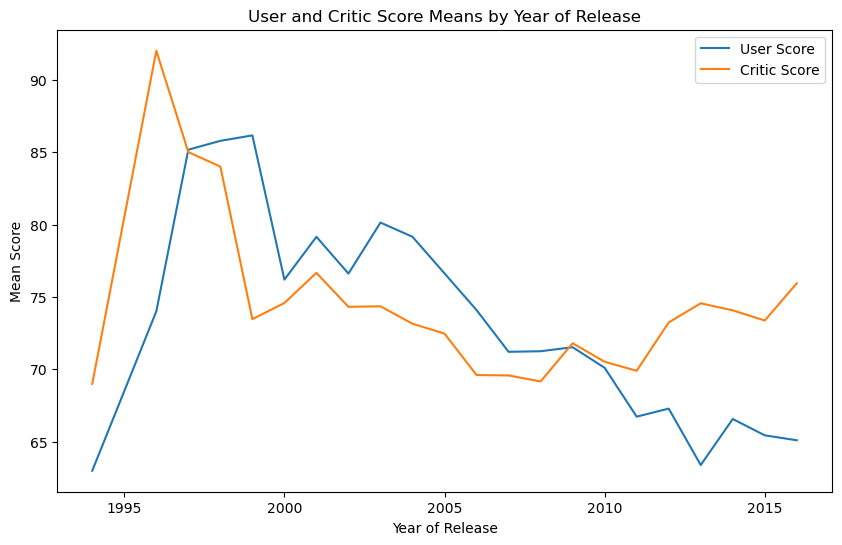

In [22]:
length = filtered_df.groupby("Year_of_Release")["User_Score"]\
            .agg(['count', 'mean'])\
            .sort_values(by='Year_of_Release')

length2 = filtered_df.groupby("Year_of_Release")["Critic_Score"]\
            .agg(['count', 'mean'])\
            .sort_values(by='Year_of_Release')


plt.figure(figsize=(10, 6))
plt.plot(length['mean'].dropna(), label='User Score')
plt.plot(length2['mean'].dropna(), label='Critic Score')


plt.xlabel('Year of Release')
plt.ylabel('Mean Score')
plt.title('User and Critic Score Means by Year of Release')
plt.legend()


plt.show()

In [23]:
correlation = filtered_df['Critic_Score'].corr(filtered_df['Global_Sales'])
correlation 

0.34043103965749855

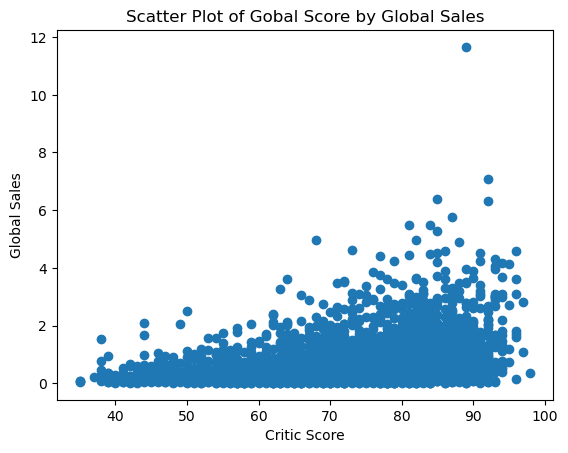

In [79]:
#plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Critic_Score'], filtered_df['Global_Sales'])
plt.title('Scatter Plot of Critic Score by Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.show()


In [25]:
filtered_df.dropna(inplace=True)
correlation_na = filtered_df['Critic_Score'].corr(filtered_df['NA_Sales'])
correlation_eu = filtered_df['Critic_Score'].corr(filtered_df['EU_Sales'])
correlation_jp = filtered_df['Critic_Score'].corr(filtered_df['JP_Sales'])
correlation_global = filtered_df['Critic_Score'].corr(filtered_df['Global_Sales'])

correlation_global 
correlation_jp
correlation_eu 
correlation_na
print(correlation_global,correlation_jp,correlation_eu,correlation_na)

0.34058621600672245 0.1313042615241507 0.2780654450210036 0.32182213512266394


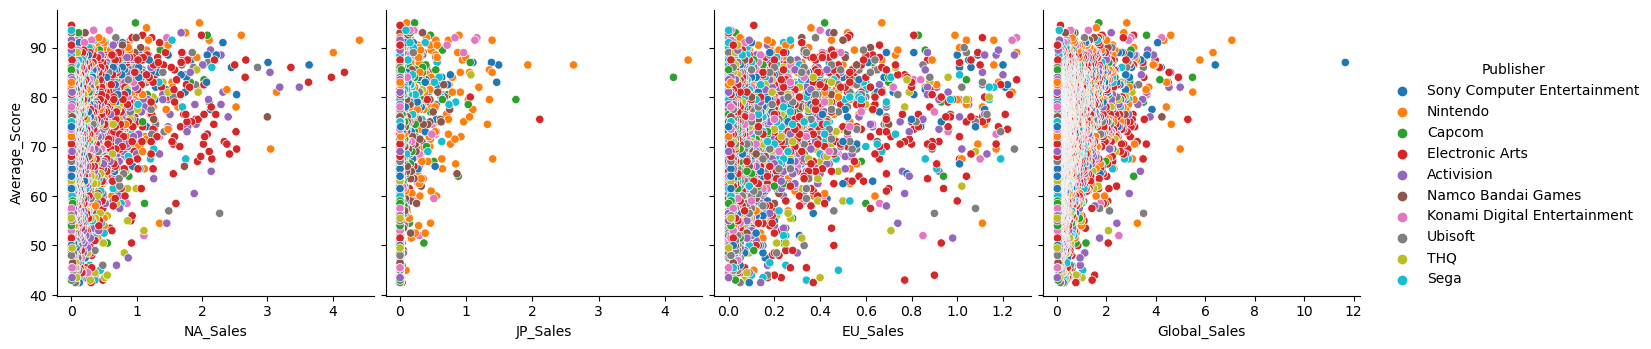

In [26]:
sns.pairplot(x_vars=['NA_Sales', 'JP_Sales', \
                     'EU_Sales', 'Global_Sales'], \
             y_vars=['Average_Score'], \
             hue='Publisher', 
             height=3.5,
             data=filtered_df);


In [27]:
sales_columns= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
no_zeros_df = filtered_df[(filtered_df[sales_columns] != 0).all(axis=1)]
# no_zeros_df

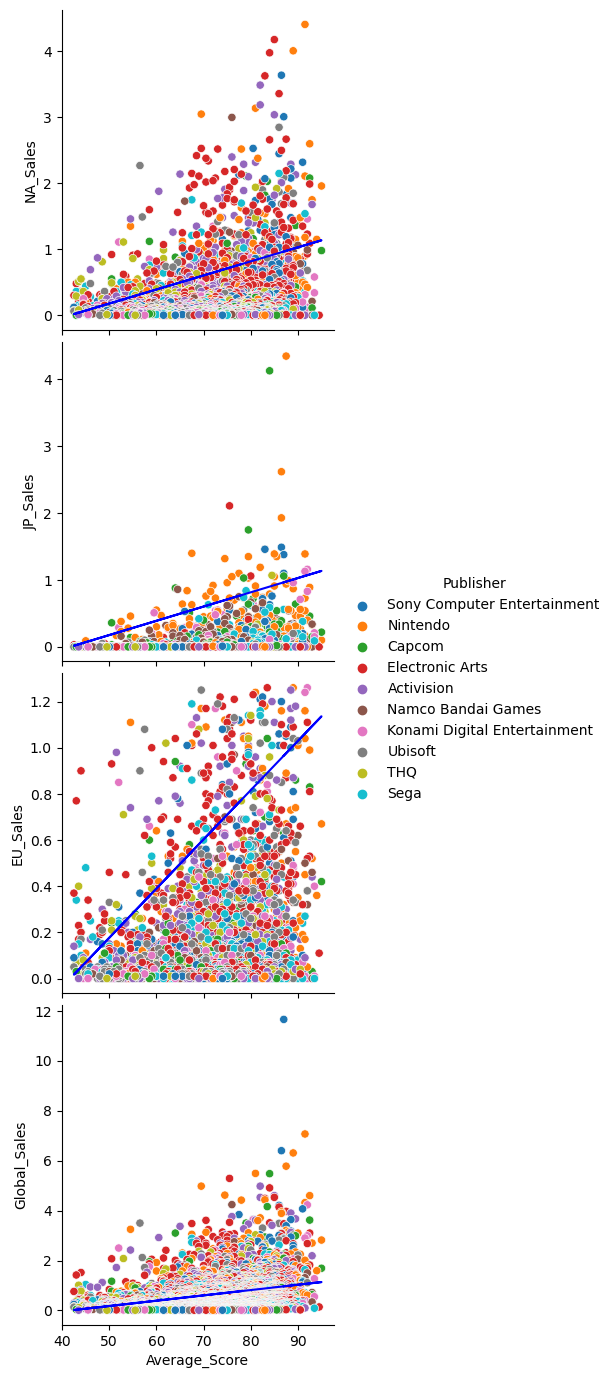

In [28]:
filtered_df=filtered_df.loc[filtered_df['Year_of_Release']>0.5]

pairplot=sns.pairplot(x_vars=['Average_Score'], \
             y_vars=['NA_Sales', 'JP_Sales', \
                     'EU_Sales', 'Global_Sales'], \
             hue='Publisher', 
             height=3.5,
             data=filtered_df);

for ax in pairplot.axes.flat:
    # Get the data from the axes
    x = filtered_df['Average_Score']
    y = filtered_df['Global_Sales']
    
    # Calculate the line of best fit
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    line_of_best_fit = polynomial(x)
    
    # Plot the line of best fit
    ax.plot(x, line_of_best_fit, color='blue')
plt.show()


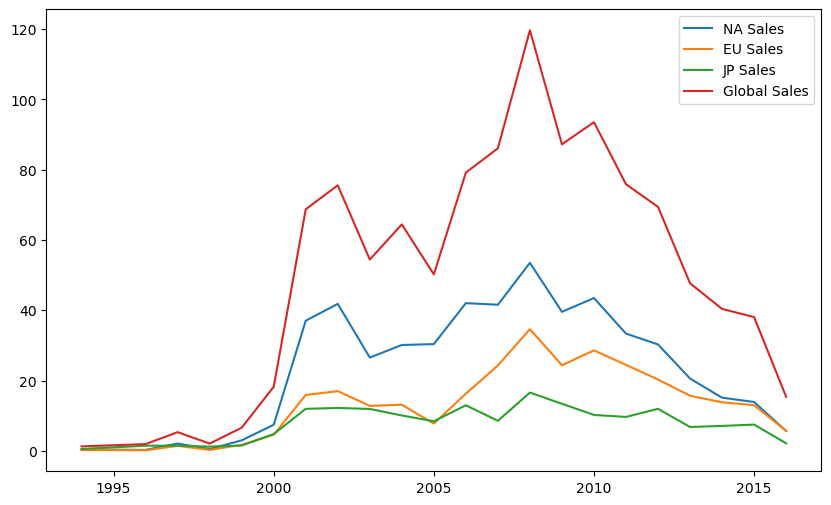

In [69]:

sales_by_year = no_zeros_df.groupby("Year_of_Release")[sales_columns].sum() 

                                    
plt.figure(figsize=(10,6))
plt.plot(sales_by_year.index, sales_by_year [ 'NA_Sales'], label="NA Sales") 
plt.plot(sales_by_year.index, sales_by_year [ 'EU_Sales'],label="EU Sales") 
plt.plot(sales_by_year.index, sales_by_year ["JP_Sales"],label="JP Sales") 
plt.plot(sales_by_year.index, sales_by_year ['Global_Sales'],label="Global Sales")
plt.legend()

plt.show()

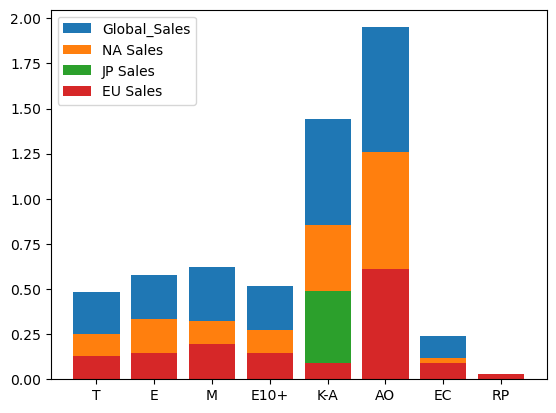

In [72]:
# A0= Adult Only
# K-A=Kids to adults (everyone)
# E=Everyone
# E10+=Over 10
# T=Teen
# EC=preschool audience
# RP=Rating pending

length = no_tbd_df.groupby("Rating")["Global_Sales"]\
              .agg(['count', 'mean'])\
              .sort_values(by='count', ascending=False)

length1 = no_tbd_df.groupby("Rating")["NA_Sales"]\
              .agg(['count', 'mean'])\
              .sort_values(by='count', ascending=False)

length2 = no_tbd_df.groupby("Rating")["JP_Sales"]\
              .agg(['count', 'mean'])\
              .sort_values(by='count', ascending=False)

length3 = no_tbd_df.groupby("Rating")["EU_Sales"]\
              .agg(['count', 'mean'])\
              .sort_values(by='count', ascending=False)



plt.bar(length.index,length['mean'].dropna(), label='Global_Sales')
plt.bar(length1.index,length1['mean'].dropna(), label='NA Sales')
plt.bar(length2.index,length2['mean'].dropna(), label='JP Sales')
plt.bar(length3.index,length3['mean'].dropna(), label='EU Sales')

plt.legend()

plt.show()
#Was trying to make them multiple bars instead, but couldn't work it out. Also JP has hardly any? 

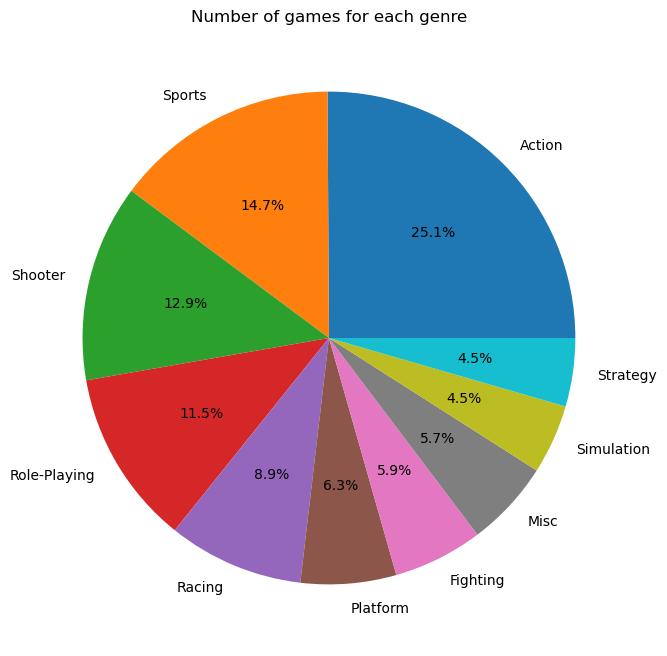

In [104]:
length = no_tbd_df.groupby("Genre")["Average_Score"]\
              .agg(['count', 'mean'])\
              .sort_values(by='count', ascending=False)\
              .head(10)

plt.figure(figsize=(8, 8))
plt.pie(length['count'], labels=length.index, autopct='%1.1f%%')
plt.title('Number of games for each genre')



plt.show()

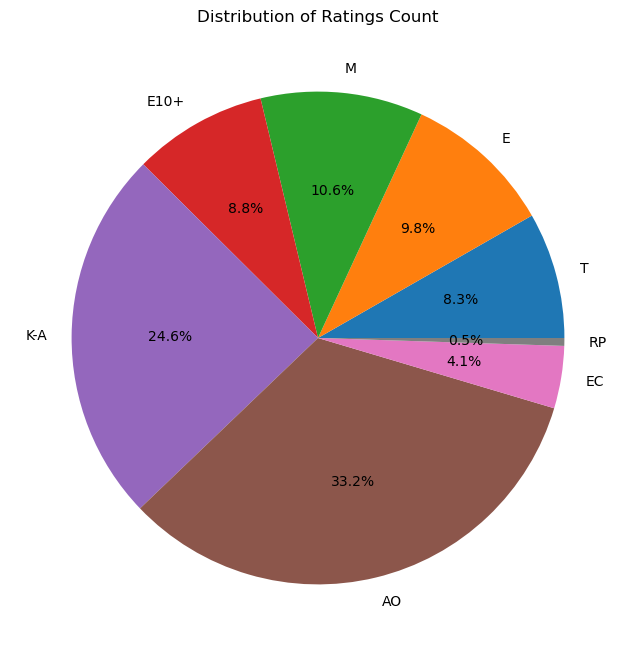

In [117]:
length = no_tbd_df.groupby("Rating")["Global_Sales"]\
              .agg(['count', 'mean'])\
              .sort_values(by='count', ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(length['mean'], labels=length.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings by average global sales')


plt.show()